In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum04/"

In [ ]:
df = pd.read_csv(path + "data/stunting_wasting_dataset.csv", sep=",")

df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [ ]:
df['Stunting'].unique()

array(['Tall', 'Stunted', 'Normal', 'Severely Stunted'], dtype=object)

In [ ]:
df['Jenis Kelamin'].unique()

array(['Laki-laki', 'Perempuan'], dtype=object)

In [ ]:
map_stunt = {'Stunted' : 1, 'Severely Stunted' : 1, 'Normal' : 0, 'Tail' : 0}
df['Stunting_bin'] = df['Stunting'].map(map_stunt).astype('Int64')

df['JK_bin'] = (df['Jenis Kelamin'] == 'Laki-laki').astype(int)

print("Distribusi Stunting_bin:\n", df['Stunting_bin'].value_counts())
print("\nDistribusi JK_bin:\n", df['JK_bin'].value_counts())

Distribusi Stunting_bin:
 Stunting_bin
0    72312
1    21979
Name: count, dtype: Int64

Distribusi JK_bin:
 JK_bin
1    50179
0    49821
Name: count, dtype: int64


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting_bin,JK_bin
Umur (bulan),1.000000,0.875869,0.665389,0.036711,0.004046
Tinggi Badan (cm),0.875869,1.000000,0.626005,-0.277709,0.073505
Berat Badan (kg),0.665389,0.626005,1.000000,0.019932,0.045797
Stunting_bin,0.036711,-0.277709,0.019932,1.000000,-0.005134
JK_bin,0.004046,0.073505,0.045797,-0.005134,1.000000


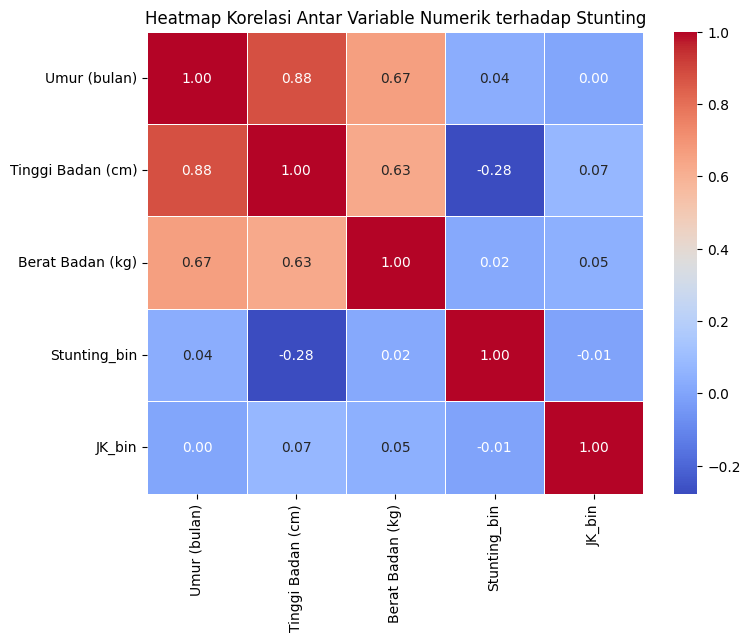

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variable Numerik terhadap Stunting', fontsize=12)
plt.show()

In [ ]:
feature_num = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
feature_bin = ['JK_bin']

use_cols = feature_num + feature_bin +['Stunting_bin']
df_model = df[use_cols].dropna().copy()

X = df_model[feature_num + feature_bin]
y = df_model['Stunting_bin']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (94291, 4)
y shape: (94291,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)


Data latih: (75432, 4)
Data uji: (18859, 4)


In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

clf.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(f"Akkurasi : {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi  : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC  : {roc_auc_score(y_test, y_prob):.4f}")

Akkurasi : 0.8998
Presisi  : 0.7172
Recall   : 0.9413
F1 Score : 0.8141
ROC AUC  : 0.9602


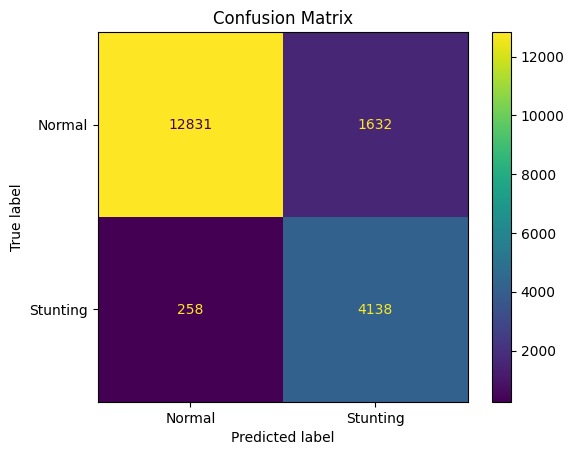

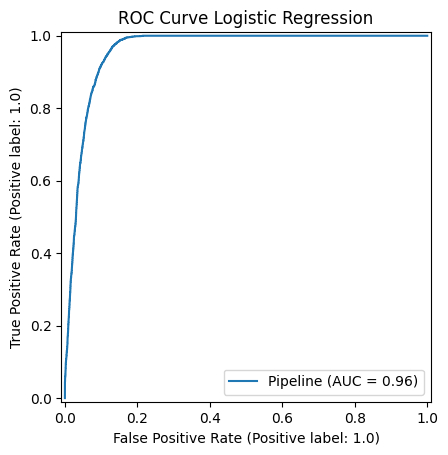

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Normal','Stunting']).plot(values_format='d')

plt.title('Confusion Matrix')
plt.show()

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred, target_names=['Tidak stunting (0)', 'stunting (1)']))

                    precision    recall  f1-score   support

Tidak stunting (0)       0.98      0.89      0.93     14463
      stunting (1)       0.72      0.94      0.81      4396

          accuracy                           0.90     18859
         macro avg       0.85      0.91      0.87     18859
      weighted avg       0.92      0.90      0.90     18859



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X , y, cv=5)

print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.90200965 0.897338   0.9009439  0.89346696 0.89532294]
Rata-rata akurasi: 0.8978162900662788
Standar deviasi: 0.0032474110158689645


In [ ]:
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)' : odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

print(coef_df)

               Fitur  Koefisien (log-odds)  Odds Ratio (e^coef)
0       Umur (bulan)              8.438441          4621.346841
3             JK_bin              1.649801             5.205945
2   Berat Badan (kg)              0.658246             1.931401
1  Tinggi Badan (cm)            -10.313871             0.000033


In [ ]:
data_baru  = pd.DataFrame({
    'Umur (bulan)':[24, 10],
    'Tinggi Badan (cm)': [79.0, 72.5],
    'Berat Badan (kg)' : [9.2, 7.8],
    'JK_bin' : [1, 0]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:,1]

hasil = data_baru.copy()
hasil['prob_Stunting'] = prob
hasil['prob (0=tidak, 1=iya)'] = pred
display(hasil)

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),JK_bin,prob_Stunting,"prob (0=tidak, 1=iya)"
0,24,79.0,9.2,1,0.997942,1.0
1,10,72.5,7.8,0,0.002088,0.0
